### Group Number : 8
### Roll Numbers :
22CS60R70 - YASH PANELIYA

22CS60R04 - SAYAK ROY

18EC3AI19 - RAVI KARTHIK
### Project Number : SESVM
### Project Title : Spam Email Classification using Support Vector Machine

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import cvxopt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

## Pre-processing the data:

i. Randomly pick 70% of the data as a training set and the rest as a test set.

ii. Normalize each feature of the dataset to have zero mean and unit variance. Note that while normalizing the features, their mean and variance should be computed over the train split only. Once, the mean and variance are computed using only the train split, you normalize the test split using the mean and variance computed over the train split.

In [2]:
df = pd.read_csv('./spambase.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
# Calculating NULL percentage in each feature
((df.isnull().sum() / len(df))*100).sort_values(ascending=False).to_frame()

,0
0,0.0
43,0.0
31,0.0
32,0.0
33,0.0
34,0.0
35,0.0
36,0.0
37,0.0
38,0.0


In [4]:
# Randomize the order of rows in dataset
df = df.reindex(np.random.permutation(df.index)) 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
1631,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.699,0.932,0.000,5.083,39,122,1
1013,0.00,0.74,1.85,0.0,0.00,0.37,0.00,0.37,0.74,1.11,...,0.0,0.336,0.000,1.211,0.471,0.067,18.400,393,736,1
740,0.00,0.00,0.89,0.0,1.79,0.44,0.00,0.00,0.00,0.00,...,0.0,0.075,0.075,0.000,0.000,0.000,1.968,11,124,1
2716,0.00,0.00,2.27,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.296,0.000,0.000,5.250,32,63,0
198,0.53,0.00,1.07,0.0,0.53,0.00,1.07,0.00,0.00,0.00,...,0.0,0.000,0.000,1.183,0.253,0.000,5.454,68,180,1


In [5]:
# reset the indices of df
df = df.reset_index(drop=True)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.699,0.932,0.000,5.083,39,122,1
1,0.00,0.74,1.85,0.0,0.00,0.37,0.00,0.37,0.74,1.11,...,0.0,0.336,0.000,1.211,0.471,0.067,18.400,393,736,1
2,0.00,0.00,0.89,0.0,1.79,0.44,0.00,0.00,0.00,0.00,...,0.0,0.075,0.075,0.000,0.000,0.000,1.968,11,124,1
3,0.00,0.00,2.27,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.296,0.000,0.000,5.250,32,63,0
4,0.53,0.00,1.07,0.0,0.53,0.00,1.07,0.00,0.00,0.00,...,0.0,0.000,0.000,1.183,0.253,0.000,5.454,68,180,1


In [7]:
# replacing 0 with -1 for easy calculations
# -1: Not spam
# 1: Spam
df[57] = df[57].replace(0,-1)
df[57] = df[57].astype(float)
df[57]

0       1.0
1       1.0
2       1.0
3      -1.0
4       1.0
       ... 
4596   -1.0
4597   -1.0
4598   -1.0
4599   -1.0
4600   -1.0
Name: 57, Length: 4601, dtype: float64

In [8]:
# Separating X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# generating splitting indices for 70% separation
split_idx = int(0.7 * len(df))

In [9]:
# Splitting into train and test dataset
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3220, 57)
(1381, 57)
(3220,)
(1381,)


In [11]:
# Standardize the features
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean) / std

X_test = (X_test - mean) / std

## Training the model:

i. Note that training requires solving the dual optimization problem. To solve the dual optimization problem you can use any python packages like: CVXOPT or
Scipy.optimize.minimize

ii. Implement the following three kernels: (a) linear, (b) quadratic and (c) radial basis function

Making predictions: Write a function that takes new datapoint as input and predicts the
class

In [12]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def quadratic_kernel(x1,x2):
    return np.power(np.dot(x1, x2) + 1, 2)

def rbf_kernel(x1,x2, gamma = 0.3):
    norm = np.linalg.norm(x1 - x2)
    return np.exp(-gamma * norm**2)

class SVM(object):

    def __init__(self, kernel_type='linear', C=None):
        self.kernel_type = kernel_type
        if kernel_type=='linear':
          self.kernel = linear_kernel
        elif kernel_type == 'poly':
          self.kernel = quadratic_kernel
        else:
          self.kernel = rbf_kernel
        
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        print("Number of samples: ", n_samples, " Number of features: ", n_features)

        # Gram matrix K[i, j] = K(x_i, x_j)
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        # Outer-product gives a matrix such that [i, j] = y_i * y_j
        # Element-wise multiplication gives P, such that:
        # P[i, j] = y_i * y_j * K(x_i, x_j)
        #
        # First factor of objective function:
        # 1/2 x^T P x = 1/2 * sum(alpha_i * alpha_j * y_i * y_j * K(x_i, x_j)
        P = cvxopt.matrix(np.outer(y, y) * K)

        # 2nd factor of objective function:
        # q^T x = -1 * sum(alpha)
        q = cvxopt.matrix(np.ones(n_samples) * -1)

        # Eq constraint (Ax = b): sum(alpha * y) = 0
        A = cvxopt.matrix(y, (1, n_samples))
        b = cvxopt.matrix(0.0)

        # Ineq constraint (Gx <= h):
        # alpha <= C and -alpha <= 0 (equivalent to alpha >= 0)
        if self.C is None:
            G = cvxopt.matrix(np.identity(n_samples) * -1)
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.identity(n_samples) * -1
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        cvxopt.solvers.options['show_progress'] = False
        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print(f'{len(self.a)} support vectors out of {n_samples} points')

        # Intercept - average over indices where 0 < alpha_i < C
        self.b = 0
        alpha_diff_C_count = 0
        is_eq_to_C = lambda a: self.C is not None and a > self.C - 1e-5

        for n in range(len(self.a)):
            if is_eq_to_C(self.a[n]):
                continue

            alpha_diff_C_count += 1
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])

        self.b = self.b / alpha_diff_C_count if alpha_diff_C_count > 0 else 0

        print("b: ", self.b)

        # Weight vector: we can't compute w if we are using a kernel
        # since the sum would be over alpha * y * phi(x), where
        # phi is the implicit mapping embedded in the kernel
        if self.kernel_type == 'linear':
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    # function to project the datapoint on plot
    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    # function to predict label
    def predict(self, X):
        return np.sign(self.project(X))

Evaluation: Finally, you should generate results on the given data and compare its results with the sklearn module (sklearn.svm)

In [13]:
s = SVM(C=10, kernel_type='rbf')
s.fit(X_train, y_train)

y_pred=(s.predict(X_test))

print(classification_report(y_pred, y_test))

Number of samples:  3220  Number of features:  57
2603 support vectors out of 3220 points
b:  -0.21767072667624207
              precision    recall  f1-score   support

        -1.0       0.98      0.81      0.89      1003
         1.0       0.66      0.95      0.78       378

    accuracy                           0.85      1381
   macro avg       0.82      0.88      0.83      1381
weighted avg       0.89      0.85      0.86      1381



Evaluation using sklearn library

In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (Linear): {acc}")

clf = svm.SVC(kernel='poly', C=1)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (Quadratic): {acc}")

clf = svm.SVC(kernel='rbf', C=1)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (RBF): {acc}")

Accuracy (Linear): 0.9239681390296887
Accuracy (Quadratic): 0.7711803041274439
Accuracy (RBF): 0.9348298334540188


## Making predictions and evaluation

In [15]:
from collections import defaultdict

# different C values
c_values = [1,10,100]
kernels = ['linear', 'poly', 'rbf']

model_acc = defaultdict(dict)
sklearn_acc = defaultdict(dict)

for c in c_values:
  for kernel in kernels:
    # running our model
    svmobj = SVM(C=c, kernel_type=kernel)
    svmobj.fit(X_train, y_train)
    y_pred=(svmobj.predict(X_test))
    model_acc[c][kernel] = accuracy_score(y_test, y_pred)

    # sklearn mode
    clf = svm.SVC(kernel=kernel, C=c)
    if kernel=='poly':
      clf = svm.SVC(kernel=kernel, C=c, degree=2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    sklearn_acc[c][kernel] = accuracy_score(y_test, y_pred)

Number of samples:  3220  Number of features:  57
674 support vectors out of 3220 points
b:  -1.8796091893144848
Number of samples:  3220  Number of features:  57
573 support vectors out of 3220 points
b:  -0.48928131929360685
Number of samples:  3220  Number of features:  57
2638 support vectors out of 3220 points
b:  -0.27525421041672743
Number of samples:  3220  Number of features:  57
653 support vectors out of 3220 points
b:  -3.8189301688360615
Number of samples:  3220  Number of features:  57
523 support vectors out of 3220 points
b:  -0.6193040159016726
Number of samples:  3220  Number of features:  57
2603 support vectors out of 3220 points
b:  -0.21767072667624207
Number of samples:  3220  Number of features:  57
1011 support vectors out of 3220 points
b:  -6.250623819795061
Number of samples:  3220  Number of features:  57
502 support vectors out of 3220 points
b:  -1.1952157867475202
Number of samples:  3220  Number of features:  57
2680 support vectors out of 3220 points
b

In [16]:
model_acc

defaultdict(dict,
            {1: {'linear': 0.9239681390296887,
              'poly': 0.9029688631426502,
              'rbf': 0.837074583635047},
             10: {'linear': 0.9232440260680667,
              'poly': 0.8979000724112962,
              'rbf': 0.8493845039826213},
             100: {'linear': 0.9196234612599565,
              'poly': 0.8986241853729182,
              'rbf': 0.8472121650977552}})

In [17]:
sklearn_acc

defaultdict(dict,
            {1: {'linear': 0.9239681390296887,
              'poly': 0.8435916002896452,
              'rbf': 0.9348298334540188},
             10: {'linear': 0.9232440260680667,
              'poly': 0.9246922519913107,
              'rbf': 0.9341057204923968},
             100: {'linear': 0.9188993482983345,
              'poly': 0.9152787834902245,
              'rbf': 0.9203475742215785}})

In [18]:
model_df = pd.DataFrame(model_acc)
print("Our model accuracies:")
model_df

Our model accuracies:


,1,10,100
linear,0.923968,0.923244,0.919623
poly,0.902969,0.897900,0.898624
rbf,0.837075,0.849385,0.847212


Best Accuracy is achieved using Linear kernel with soft margin(C) of 100.

In [19]:
sk_df = pd.DataFrame(sklearn_acc)
print("Sklearn model accuracies:")
sk_df

Sklearn model accuracies:


,1,10,100
linear,0.923968,0.923244,0.918899
poly,0.843592,0.924692,0.915279
rbf,0.934830,0.934106,0.920348


## Visualization

a. Consider the model (with best hyper-parameters) and plot the decision boundary and the support vectors, on both train & test set.

In [20]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [21]:
pca = PCA(n_components = None)
dfx_pca = pca.fit(X_train)

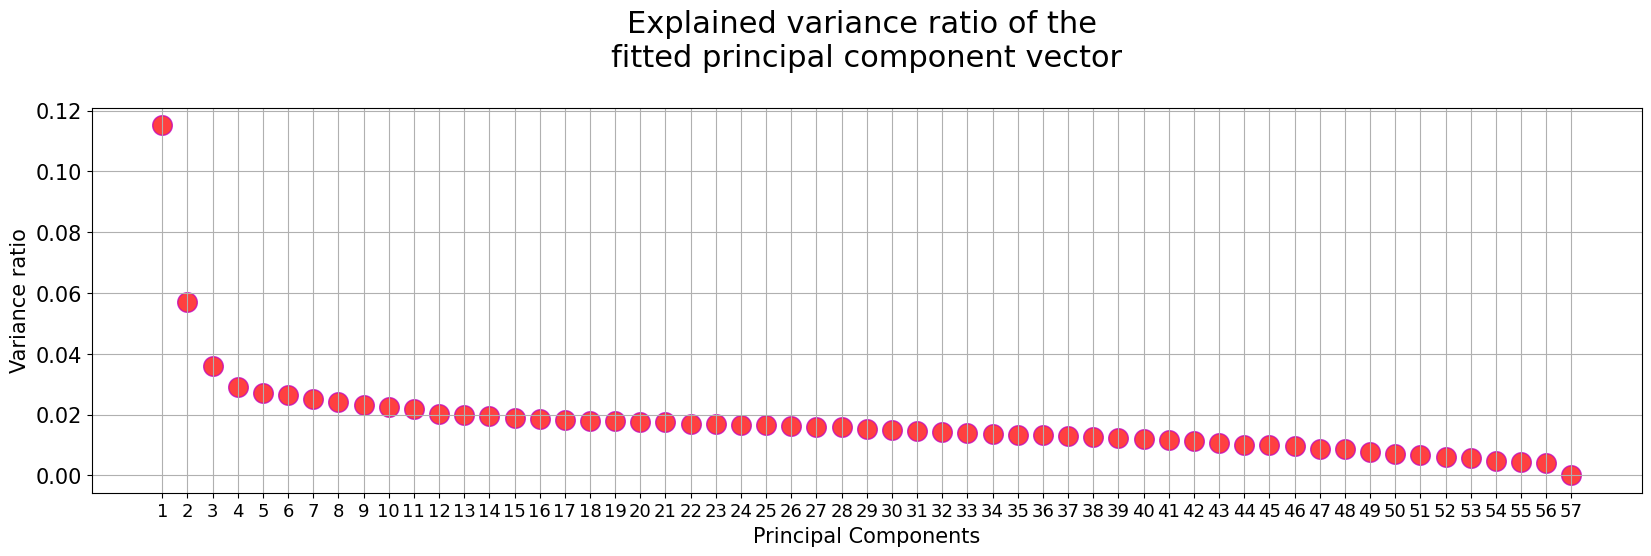

In [22]:
plt.figure(figsize=(20,5))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
            s=200, alpha=0.75, c='red', edgecolor='m')
plt.grid(True)
plt.title('Explained variance ratio of the \nfitted principal component vector\n',fontsize=22)
plt.xlabel('Principal Components', fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))], fontsize=13)
plt.yticks(fontsize=15)
plt.ylabel('Variance ratio', fontsize=15)
plt.show()

In [23]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [24]:
X_norm = (X-mean)/std

In [25]:
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X_norm)
Xreduced

array([[-0.76038912,  0.0636157 ],
       [-1.19867225,  3.07401911],
       [-1.03716089,  0.88196898],
       ...,
       [ 0.13251441, -1.03690246],
       [-0.77053224, -0.45857593],
       [-0.38191874, -1.14420533]])

In [26]:
X_train = Xreduced[:split_idx]
X_test = Xreduced[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [ ]:
Xreduced = pd.DataFrame(data=Xreduced)
plt.figure(figsize=(20,10))
plt.scatter(X_test[0], X_test[1], c=pd.DataFrame(data=y_test), edgecolors='m', alpha=0.75, s=150)
plt.grid(True)
plt.title('Class seperation using first 2 principal components\n', fontsize=20)
plt.xlabel('PC-1', fontsize=13)
plt.ylabel("PC-2", fontsize=13)
plt.show()

In [29]:
(X_train.shape,
y_train.shape)

((3220, 2), (3220,))

In [30]:
svmobj = SVM(C=100, kernel_type='linear')
svmobj.fit(X_train, y_train)

Number of samples:  3220  Number of features:  2
2157 support vectors out of 3220 points
b:  -0.28432803837897364


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


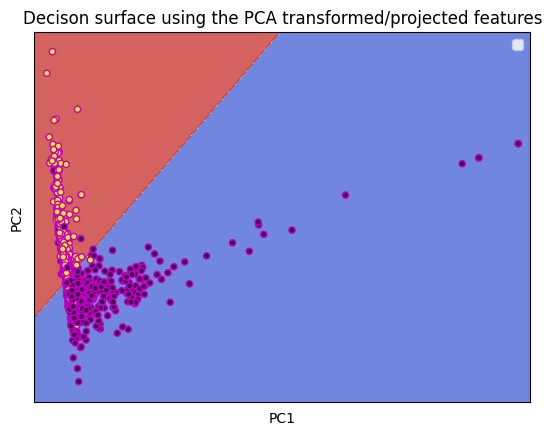

In [31]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svmobj, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=pd.DataFrame(data=y_test), s=20, edgecolors='m')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


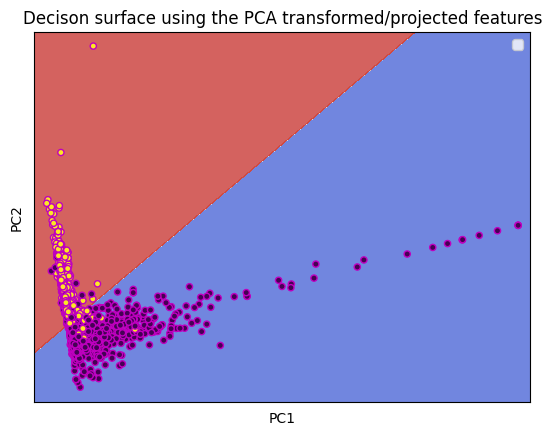

In [32]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svmobj, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, s=20, edgecolors='m')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()